# NLTK vs TextBlob: Comparison of Sentiment Analysis Applyied to Elon Musk's X Profile

## Imports

In [34]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk

## Get dataset

In [35]:
file_path = '/home/daniele/x_twitter_engagement/data/dataset_twitter-scraper_2024-03-15_14-22-12-784.csv'
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 84 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   conversation_id                            99 non-null     int64  
 1   created_at                                 99 non-null     object 
 2   favorite_count                             99 non-null     int64  
 3   full_text                                  99 non-null     object 
 4   id                                         99 non-null     int64  
 5   is_pinned                                  99 non-null     bool   
 6   is_quote_tweet                             99 non-null     bool   
 7   is_retweet                                 99 non-null     bool   
 8   is_truncated                               99 non-null     bool   
 9   media/0/media_url                          55 non-null     object 
 10  media/0/type                

## Create a function to clean the tweets and add to dataframe

In [36]:
def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

df['cleaned_text'] = df['full_text'].apply(cleantwt)

## Remove blank and check duplicated

In [37]:
df.drop(df[df['cleaned_text'] == ''].index, inplace = True)
df.duplicated().sum()

df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user/screen_name,user/statuses_count,user/translator_type,user/verified,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text
0,1519480761749016577,2022-04-28T00:56:58.000Z,4519149,Next I’m buying Coca-Cola to put the cocaine b...,1519480761749016577,False,False,False,False,NaN,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,Next I’m buying Coca-Cola to put the cocaine b...
1,1518623997054918657,2022-04-25T16:12:30.000Z,3054758,I hope that even my worst critics remain on Tw...,1518623997054918657,False,False,False,False,NaN,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,I hope that even my worst critics remain on Tw...
2,1519495072802390016,2022-04-28T01:53:50.000Z,2499261,Let’s make Twitter maximum fun!,1519495072802390016,False,False,False,False,NaN,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,Let’s make Twitter maximum fun!
3,1518677066325053441,2022-04-25T19:43:22.000Z,2466722,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,1518677066325053441,False,False,False,False,https://pbs.twimg.com/media/FRNsuSFWUAUW6aP.jpg,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,Yesss!!!
4,1519495982723084290,2022-04-28T01:57:27.000Z,2429989,"Listen, I can’t do miracles ok https://t.co/z7...",1519495982723084290,False,False,False,False,https://pbs.twimg.com/media/FRZViwWX0AMsqQ1.jpg,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,"Listen, I can’t do miracles ok"


## Create TextBlob sentiment functions

In [38]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

## Create NLTK sentiment functions

In [39]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/daniele/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Apply Sentiment Functions

In [40]:
df['textblob_polarity'] = df['cleaned_text'].apply(getPolarity)
df['textblob_subjectivity'] = df['cleaned_text'].apply(getSubjectivity)
df['nltk_polarity'] = df['cleaned_text'].apply(get_sentiment)

df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user/verified,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text,textblob_polarity,textblob_subjectivity,nltk_polarity
0,1519480761749016577,2022-04-28T00:56:58.000Z,4519149,Next I’m buying Coca-Cola to put the cocaine b...,1519480761749016577,False,False,False,False,NaN,...,True,NaN,NaN,NaN,NaN,NaN,Next I’m buying Coca-Cola to put the cocaine b...,0.000,0.0,0.0000
1,1518623997054918657,2022-04-25T16:12:30.000Z,3054758,I hope that even my worst critics remain on Tw...,1518623997054918657,False,False,False,False,NaN,...,True,NaN,NaN,NaN,NaN,NaN,I hope that even my worst critics remain on Tw...,-0.300,0.9,-0.0258
2,1519495072802390016,2022-04-28T01:53:50.000Z,2499261,Let’s make Twitter maximum fun!,1519495072802390016,False,False,False,False,NaN,...,True,NaN,NaN,NaN,NaN,NaN,Let’s make Twitter maximum fun!,0.375,0.2,0.5562
3,1518677066325053441,2022-04-25T19:43:22.000Z,2466722,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,1518677066325053441,False,False,False,False,https://pbs.twimg.com/media/FRNsuSFWUAUW6aP.jpg,...,True,NaN,NaN,NaN,NaN,NaN,Yesss!!!,0.000,0.0,0.0000
4,1519495982723084290,2022-04-28T01:57:27.000Z,2429989,"Listen, I can’t do miracles ok https://t.co/z7...",1519495982723084290,False,False,False,False,https://pbs.twimg.com/media/FRZViwWX0AMsqQ1.jpg,...,True,NaN,NaN,NaN,NaN,NaN,"Listen, I can’t do miracles ok",0.500,0.5,0.2960


## Polarity into qualitative categories

In [53]:
def getTBSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['textblob_sentiment'] = df['textblob_polarity'].apply(getTBSentiment)

def getNLTKSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['nltk_sentiment'] = df['nltk_polarity'].apply(getNLTKSentiment)

df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text,textblob_polarity,textblob_subjectivity,nltk_polarity,textblob_sentiment,nltk_sentiment
42,1053390822991790083,2018-10-19 21:01:57+00:00,1079326,Had to been done ur welcome https://t.co/7jT0f...,1053390822991790083,False,False,False,False,https://pbs.twimg.com/media/Dp5lXiYUUAAngKq.jpg,...,NaN,NaN,NaN,NaN,Had to been done ur welcome,0.800,0.9,0.4588,Positive,Positive
18,1236029449042198528,2020-03-06 20:42:39+00:00,1430879,The coronavirus panic is dumb,1236029449042198528,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,The coronavirus panic is dumb,-0.375,0.5,-0.7650,Negative,Negative
83,1347978218494513152,2021-01-09 18:47:06+00:00,828879,"My 14-year-old son, Saxon, said he feels like ...",1347978218494513152,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,"My 14-year-old son, Saxon, said he feels like ...",0.700,0.6,0.7845,Positive,Positive
92,1349286488618491904,2021-01-13 09:25:42+00:00,792390,Legalize comedy,1349286488618491904,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Legalize comedy,0.000,0.0,0.3612,Neutral,Positive
67,1357236825589432322,2021-02-04 07:57:30+00:00,891989,ur welcome https://t.co/e2KF57KLxb,1357236825589432322,False,False,False,False,https://pbs.twimg.com/media/EtXfpgGWYAEIa7y.jpg,...,NaN,NaN,NaN,NaN,ur welcome,0.800,0.9,0.4588,Positive,Positive


## Analyze different classifications

In [54]:
opposite_sentiments_df = df[(df['nltk_sentiment'] == 'Negative') & (df['textblob_sentiment'] == 'Positive') |
                            (df['nltk_sentiment'] == 'Positive') & (df['textblob_sentiment'] == 'Negative')]

opposite_sentiments_df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text,textblob_polarity,textblob_subjectivity,nltk_polarity,textblob_sentiment,nltk_sentiment
85,1517215066550116354,2022-04-21 18:53:55+00:00,819654,"If our twitter bid succeeds, we will defeat th...",1517215066550116354,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,"If our twitter bid succeeds, we will defeat th...",0.875,0.1000,-0.7574,Positive,Negative
23,1517707521343082496,2022-04-23 03:30:45+00:00,1328893,in case u need to lose a boner fast https://t....,1517707521343082496,False,False,False,False,https://pbs.twimg.com/media/FQ_68lnWQAIuYMM.jpg,...,NaN,NaN,NaN,NaN,in case u need to lose a boner fast,0.200,0.6000,-0.4019,Positive,Negative
41,1520017094007476224,2022-04-29 12:28:10+00:00,1110562,"The far left hates everyone, themselves included!",1520017094007476224,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,"The far left hates everyone, themselves included!",0.050,0.5000,-0.4926,Positive,Negative
8,1523465632502906880,2022-05-09 00:51:26+00:00,1784888,"If I die under mysterious circumstances, it’s ...",1523465632502906880,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,"If I die under mysterious circumstances, it’s ...",0.300,1.0000,-0.2732,Positive,Negative
71,1597405399040217088,2022-11-29 01:41:40+00:00,886264,This is a battle for the future of civilizatio...,1597405399040217088,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,This is a battle for the future of civilizatio...,0.200,0.4625,-0.5267,Positive,Negative


In [55]:
mixed_sentiments_df = df[((df['nltk_sentiment'] == 'Positive') & (df['textblob_sentiment'] == 'Neutral')) |
                         ((df['nltk_sentiment'] == 'Negative') & (df['textblob_sentiment'] == 'Neutral')) |
                         ((df['textblob_sentiment'] == 'Negative') & (df['nltk_sentiment'] == 'Neutral')) |
                         ((df['textblob_sentiment'] == 'Positive') & (df['nltk_sentiment'] == 'Neutral'))
                        ]

mixed_sentiments_df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text,textblob_polarity,textblob_subjectivity,nltk_polarity,textblob_sentiment,nltk_sentiment
92,1349286488618491904,2021-01-13 09:25:42+00:00,792390,Legalize comedy,1349286488618491904,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Legalize comedy,0.0,0.0,0.3612,Neutral,Positive
21,1519469891455234048,2022-04-28 00:13:47+00:00,1378386,Twitter DMs should have end to end encryption ...,1519469891455234048,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Twitter DMs should have end to end encryption ...,0.0,0.0,0.0018,Neutral,Positive
5,1585841080431321088,2022-10-28 03:49:11+00:00,2334051,the bird is freed,1585841080431321088,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,the bird is freed,0.0,0.0,0.4019,Neutral,Positive
50,1587627120355934208,2022-11-02 02:06:16+00:00,1030589,"To all complainers, please continue complainin...",1587627120355934208,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,"To all complainers, please continue complainin...",0.0,0.0,-0.1027,Neutral,Negative
59,1595207476936413187,2022-11-23 00:07:54+00:00,913786,Wasn’t Twitter supposed to die by now or somet...,1595207476936413187,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Wasn’t Twitter supposed to die by now or somet...,0.0,0.0,-0.5994,Neutral,Negative


## TextBlob distribution of Negative, Positive and Neutral

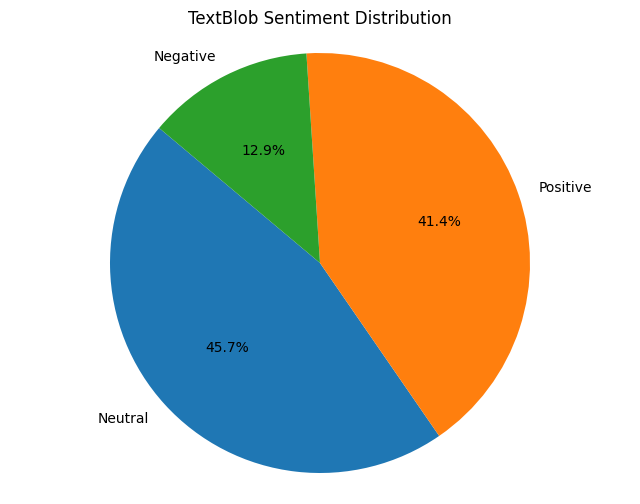

In [56]:
textblob_counts = df['textblob_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(textblob_counts, labels=textblob_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('TextBlob Sentiment Distribution')
plt.axis('equal')

plt.show()

## NLTK distribution of Negative, Positive and Neutral

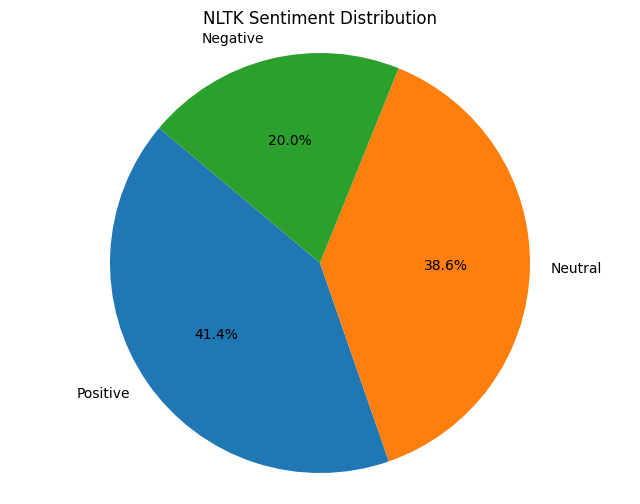

In [57]:
nltk_counts = df['nltk_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(nltk_counts, labels=nltk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('NLTK Sentiment Distribution')
plt.axis('equal')

plt.show()

## TextBlob vs NLTK distribution of Negative, Positive and Neutral

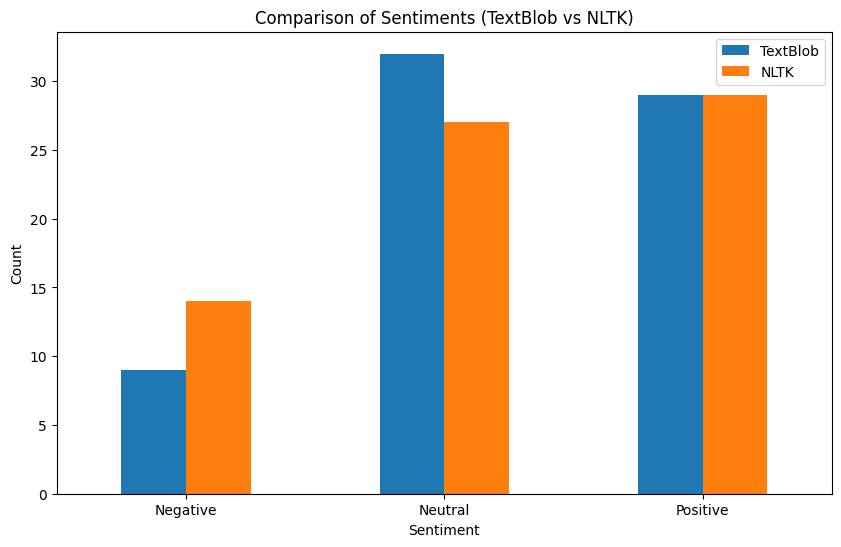

In [58]:
counts_df = pd.DataFrame({'TextBlob': textblob_counts, 'NLTK': nltk_counts})

ax = counts_df.plot(kind='bar', rot=0, figsize=(10, 6))
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Comparison of Sentiments (TextBlob vs NLTK)')
plt.show()

## Dispersion Graph NLTK Polarity X Favorite Count

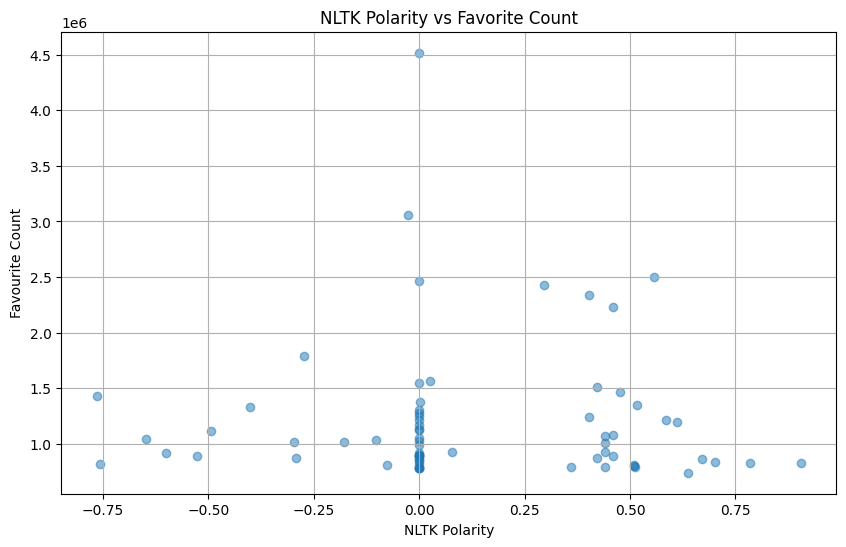

In [48]:
df_sorted = df.sort_values(by='nltk_polarity')

plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['nltk_polarity'], df_sorted['favorite_count'], alpha=0.5)
plt.xlabel('NLTK Polarity')
plt.ylabel('Favourite Count')
plt.title('NLTK Polarity vs Favorite Count')
plt.grid(True)
plt.show()

## Dispersion Graph NLTK Polarity X Reply Count

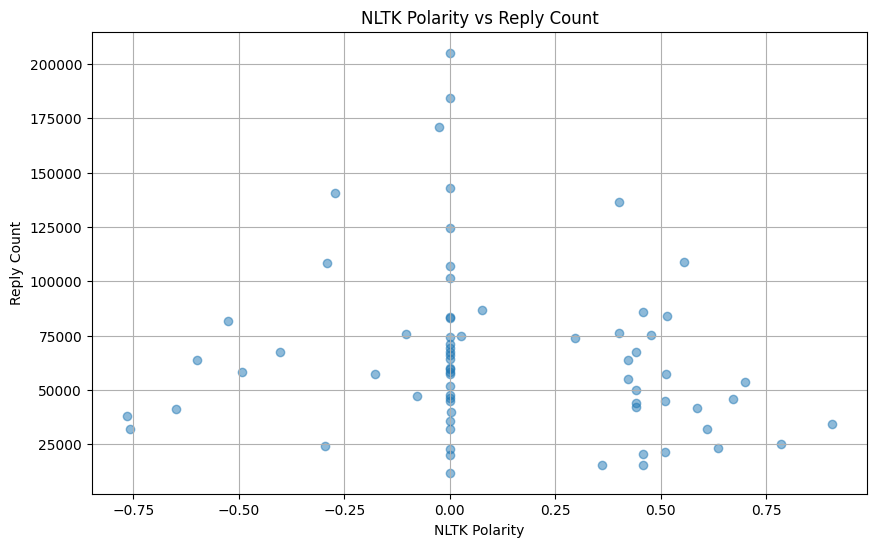

In [49]:
df_sorted = df.sort_values(by='nltk_polarity')

plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['nltk_polarity'], df_sorted['reply_count'], alpha=0.5)
plt.xlabel('NLTK Polarity')
plt.ylabel('Reply Count')
plt.title('NLTK Polarity vs Reply Count')
plt.grid(True)
plt.show()

## TextBlob Polariry vs Subjectivity

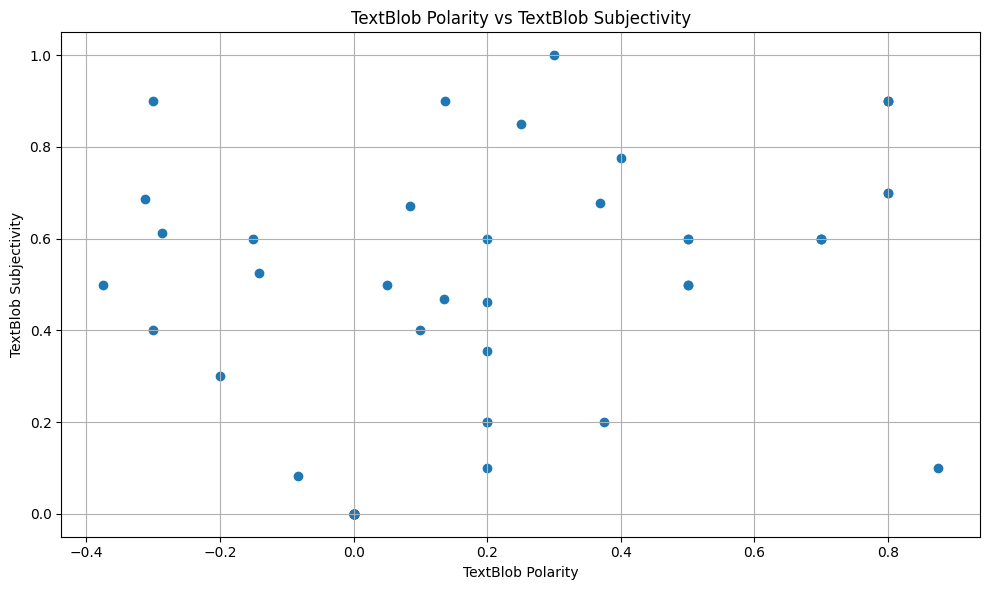

In [52]:
df = df.sort_values(by='created_at')

plt.figure(figsize=(10, 6))
plt.scatter(df['textblob_polarity'], df['textblob_subjectivity'], marker='o')
plt.title('TextBlob Polarity vs TextBlob Subjectivity')
plt.xlabel('TextBlob Polarity')
plt.ylabel('TextBlob Subjectivity')
plt.grid(True)
plt.tight_layout()

plt.show()


## Dispersion Graph TextBlob Polarity X Reply Count

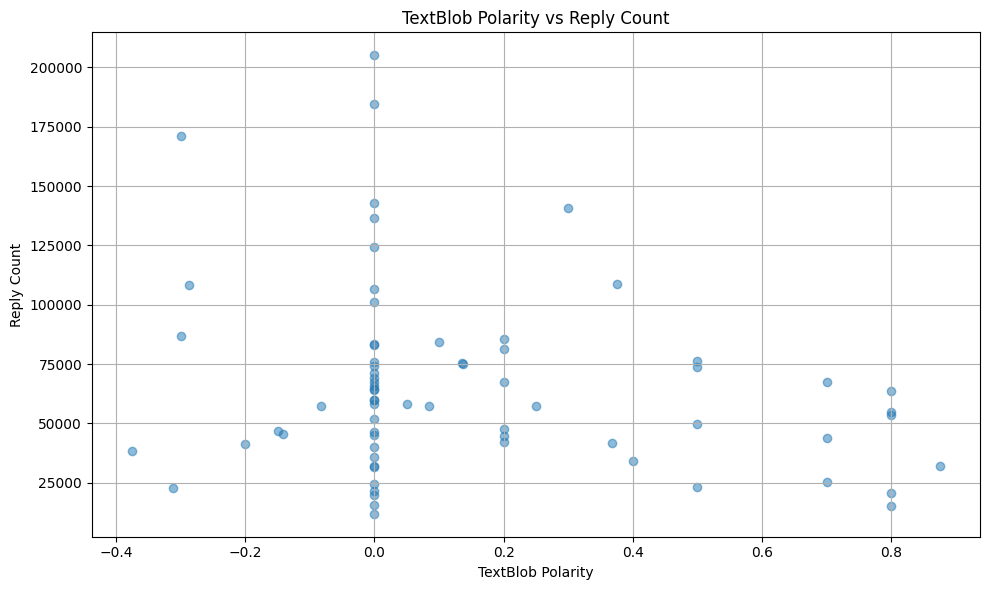

In [59]:
df_sorted = df.sort_values(by='textblob_polarity')

plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['textblob_polarity'], df_sorted['reply_count'], alpha=0.5)
plt.xlabel('TextBlob Polarity')
plt.ylabel('Reply Count')
plt.title('TextBlob Polarity vs Reply Count')
plt.grid(True)
plt.tight_layout()

plt.show()

## Dispersion Graph TextBlob Polarity X Favorite Count

In [ ]:
df_sorted = df.sort_values(by='textblob_polarity')

plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['textblob_polarity'], df_sorted['favorite_count'], alpha=0.5)
plt.xlabel('TextBlob Polarity')
plt.ylabel('Favorite Count')
plt.title('TextBlob Polarity vs Favorite Count')
plt.grid(True)
plt.tight_layout()

plt.show()